In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.io
from scipy import stats

In [11]:
path = Path.home()/'code'/'2023_CENTURI-SummerSchool'/'datasets'/'dataset1_reaching-task'/'Dataset1.mat'
data = scipy.io.loadmat(path)
R = data['R']
direction = data['direction']

In [12]:
print(R.shape) # 143 neurons x 158 trials
print(direction.shape) # 1-8

(143, 158)
(158, 1)


In [13]:
R_mean = R.mean(axis=1)

Text(0, 0.5, 'firing rate of neuron 0')

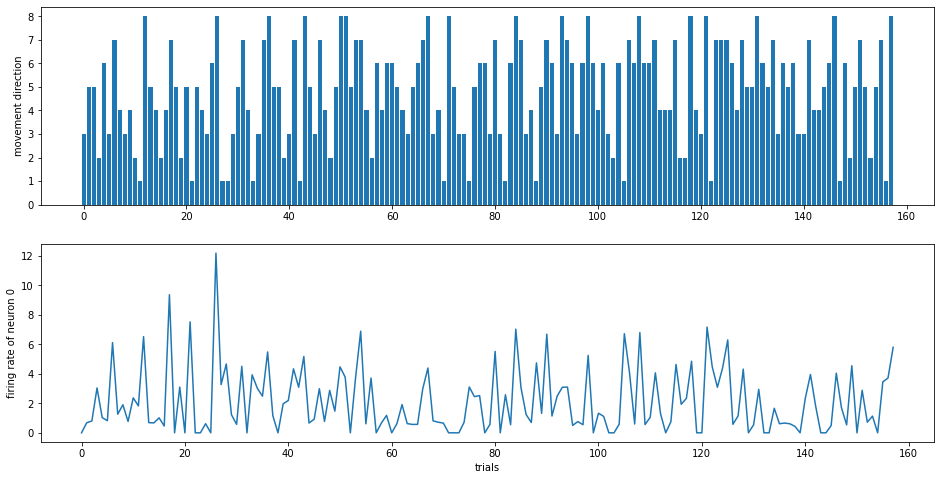

In [14]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,8))

ax[0].bar(range(158),direction[:,0])
ax[0].set_ylabel('movement direction')

ax[1].plot(R[0,:])
ax[1].set_xlabel('trials')
ax[1].set_ylabel('firing rate of neuron 0')

In [15]:
for dir_val in range(1,9):
    indices = np.where(direction[:,0]==dir_val)[0]
    print(f'{direction[indices,0].shape[0]} trials for direction {dir_val}')

14 trials for direction 1
12 trials for direction 2
22 trials for direction 3
20 trials for direction 4
25 trials for direction 5
24 trials for direction 6
24 trials for direction 7
17 trials for direction 8


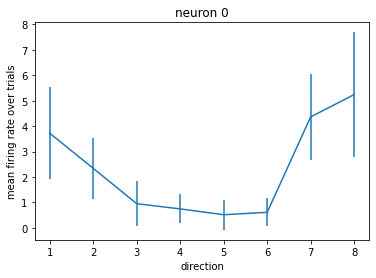

In [16]:
# Mean firing rate for neuron 0 along all directions
mean_dir_FR = []
std_dir_FR = []

for dir_val in range(1,9):
    indices = np.where(direction[:,0]==dir_val)[0]
    mean_dir_FR.append(R[0,indices].mean())
    std_dir_FR.append(R[0,indices].std())
plt.errorbar(range(8),mean_dir_FR,yerr=std_dir_FR)
plt.xticks(ticks=range(8),labels=range(1,9))
plt.title('neuron 0')
plt.ylabel('mean firing rate over trials')
plt.xlabel('direction')
plt.show()

In [17]:
def bootstrapping(firing_rates,num_iterations=1000):
    # Perform bootstrapping
    bootstrapped_means = []
    for _ in range(num_iterations):
        resample = np.random.choice(firing_rates, size=len(firing_rates), replace=True)
        bootstrapped_mean = np.mean(resample)
        bootstrapped_means.append(bootstrapped_mean)
    # return np.std(bootstrapped_means)
    return np.quantile(bootstrapped_means,q=[0.05,0.95])

In [ ]:
# Mean firing rate for all neuron along all directions
fig, ax = plt.subplots(nrows=3,ncols=8,figsize=(25,8))
for i in range(8):
    mean_dir_FR = []
    std_dir_FR = []
    standard_errors_per_trial = []
    bootstrapping_stds_per_trial = []
    for dir_val in range(1,9):
        indices = np.where(direction[:,0]==dir_val)[0]
        mean_dir_FR.append(R[i,indices].mean())
        std_dir_FR.append(R[i,indices].std())
        standard_errors_per_trial.append(stats.sem(R[i,indices])) # Calculating standard error
        bootstrapping_stds_per_trial.append(bootstrapping(R[i,indices]))
        
    ax[0][i].errorbar(range(8),mean_dir_FR,yerr=std_dir_FR)
    ax[0][i].set_ylabel('mean firing rate over trials')
    ax[0][i].set_xlabel('direction')
    
    ax[1][i].plot(standard_errors_per_trial)
    ax[1][i].set_ylabel('standard error')
    
    ax[2][i].plot(bootstrapping_stds_per_trial)
    ax[2][i].set_ylabel('bootstrapping std')
plt.tight_layout()